In this Notebook we will be covering following topics:

1.Data Preprocessing

2.Handling Missing Values

3.EDA

4.Building Machine Learning Model

5.Model Evaluation



## Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd D:\Data scientist file\Data sets

D:\Data scientist file\Data sets


## Importing dataset 

In [4]:

car=pd.read_csv("Automobile_data.csv")

In [6]:
car.head()   # first five rows of the data set 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
car.shape 

(205, 26)

#### data set consist of 205 rows and 26 columns

In [8]:
# Summary of dataset 
print("\nFeatures  :\n   ",car.columns.tolist())
print("\nMissing Values   :",car.isnull().values.sum())
print("\nUnique Values   :\n",car.nunique())


Features  :
    ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing Values   : 0

Unique Values   :
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mp

In [9]:
total=car.isnull().sum().sort_values(ascending=False)
percent=((car.isnull().sum())*100/car.isnull().count().sort_values(ascending=False))
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'],sort=False).sort_values('Total',ascending=False)
missing_data.head(40)


,Total,Percent
price,0,0.0
highway-mpg,0,0.0
city-mpg,0,0.0
peak-rpm,0,0.0
horsepower,0,0.0
compression-ratio,0,0.0
stroke,0,0.0
bore,0,0.0
fuel-system,0,0.0
engine-size,0,0.0


#We see from above data that there are no missing values in the dataset


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Using the info command we can see that in many place data is represented by symbols ? .We have to replace ? with mean values
of columns. We have to prepare data by doing cleaning on the dataset 

# Handling missing Values

Replacing ? symbol with mean of the column

In [11]:
a=car[car["normalized-losses"]!='?']
b=(a["normalized-losses"].astype(int).mean())
car["normalized-losses"]=car["normalized-losses"].replace('?',b).astype(int)


We can see that in some places the value of num-of-doors is marked as ?.we will this with appropriate value of num of doors.

In [12]:
a=car[car["body-style"]=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In case of sedan car the value of num of doors missing in 2 places. We can
see that most of the Sedan cars have 4 doors. We can replce missing value of num of doors with value 4 


In [13]:
a=car["num-of-doors"].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a


# Cleaning price,Horse power, Bore,Stroke and peak RPM

In [14]:
a=car[car["price"]!='?']
b=(a["price"].astype(int)).mean()
car["price"]=car["price"].replace('?',b).astype(int)




In [15]:
a=car[car["horsepower"]!='?']
b=(a["horsepower"].astype(int).mean())
car["horsepower"]=car["horsepower"].replace('?',b).astype(int)

a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car["bore"]=car["bore"].replace('?',b).astype(float)

a=car[car["stroke"]!='?']
b=(a["stroke"].astype(float).mean())
car["stroke"]=car["stroke"].replace('?',b).astype(float)

a=car[car["peak-rpm"]!='?']
b=(a["peak-rpm"].astype(float).mean())
car["peak-rpm"]=car["peak-rpm"].replace("?",b).astype(float)

missing all the ? symbol with the mean value of the column

# Cleaning the number of cylinders

In [16]:
a=car['num-of-cylinders'].map({'five':5,'four':4,'six':6,'three':3,'eight':8,'twelve':12})
car['num-of-cylinders']=a

In [17]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
num-of-doors,205.0,3.131707,0.993715,2.00,2.00,4.00,4.00,4.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,201.0,4.427861,1.037314,3.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


# Exploratory Data Analysis

# Make

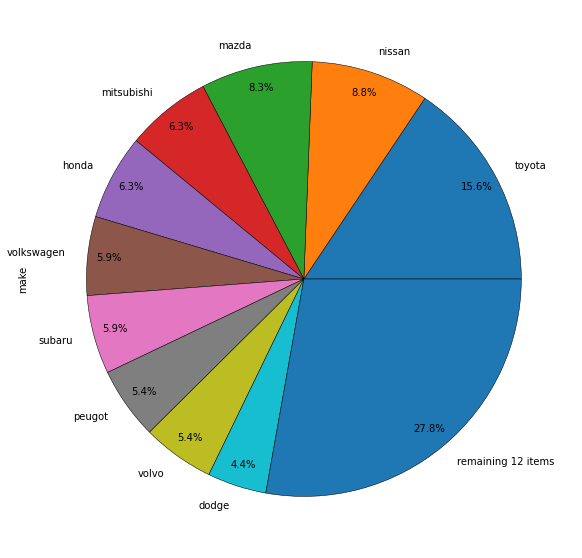

In [20]:
temp=car['make'].value_counts()

temp2=temp.head(10)
if len(temp) > 10:
    temp2['remaining {0} items'.format(len(temp)-10)]=sum (temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",pctdistance=0.9,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},figsize=(10,10))

    
pass

Toyota has maximum sales US market 

<AxesSubplot:xlabel='Count', ylabel='make'>

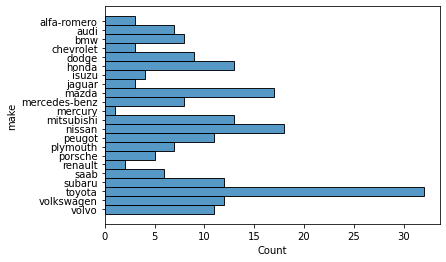

In [23]:
sns.histplot(car["make"],y=car["make"])

we have more Toyota cars in the data set

# Fuel Type

gas       185
diesel     20
Name: fuel-type, dtype: int64

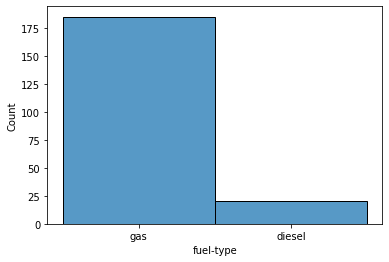

In [24]:
sns.histplot(car['fuel-type'])
car['fuel-type'].value_counts()

maximum People use gasoline cars in US.

# cars of different make in the data set


In [25]:
print("Different car makers in the data set:" ,car.make.unique())

Different car makers in the data set: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


# Understanding the range of important features


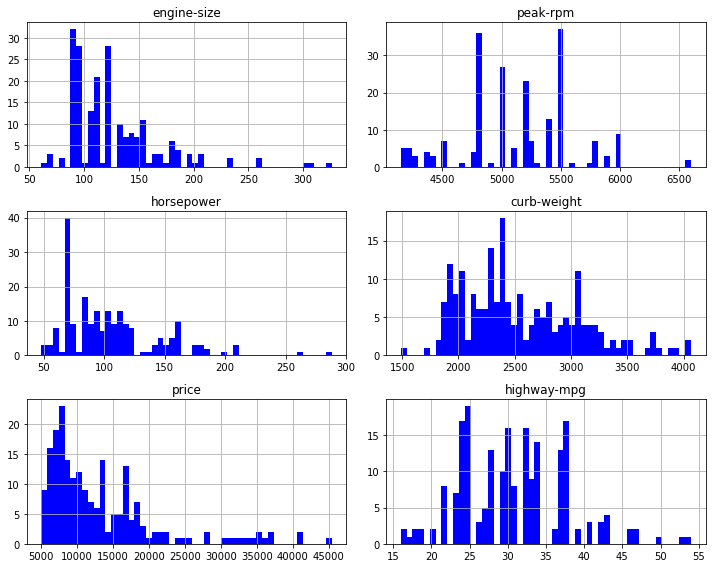

In [26]:
car[["engine-size","peak-rpm","horsepower","curb-weight","price","highway-mpg"]].hist(figsize=(10,8),bins=50,color="b",linewidth='2')
plt.tight_layout()
plt.show()

# WHICH CAR MAKE MORE IN DATA SET?

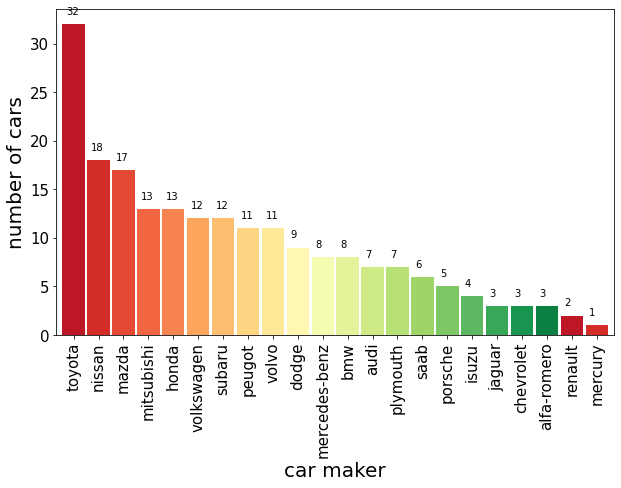

In [27]:
plt.subplots(figsize=(10,6))
ax=car["make"].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.xticks(rotation="vertical")
plt.ylabel('number of cars',fontsize=20)
plt.xlabel("car maker",fontsize=20)
ax.tick_params(labelsize=15)

plt.show()

As expected toyota cars sold more in US. In 70's due to fuel price rise Americans switched to small cars 
Japanese car makers are good at making high quality small cars

# cars by Body Type

In [28]:
print('Different types of cars',car['body-style'].unique())

Different types of cars ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


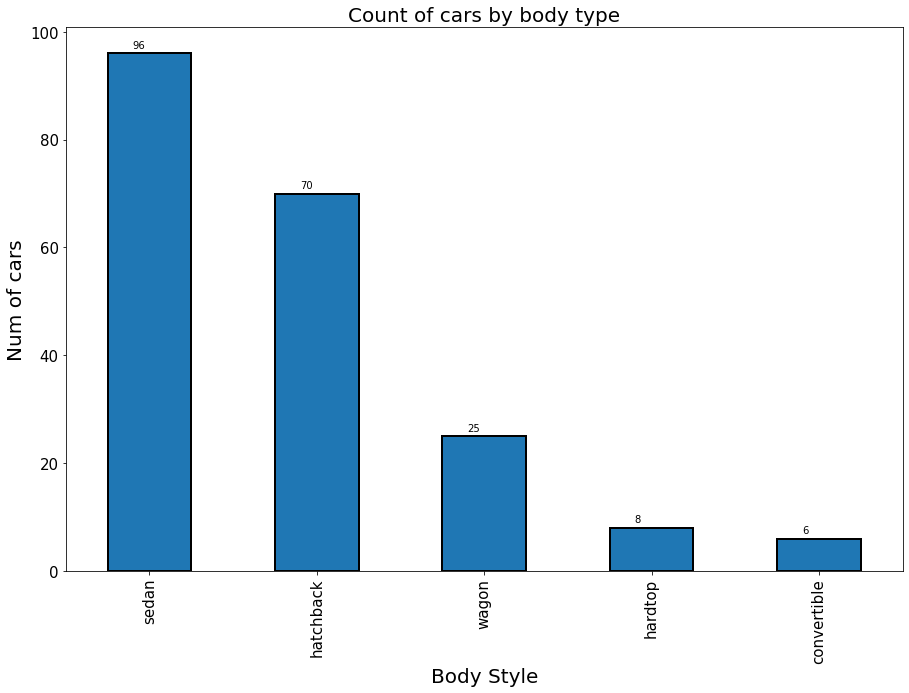

In [29]:
fig=plt.figure(figsize=(15,10))
cars_type=car.groupby(['body-style']).count()['make']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)

for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15, p.get_height()+1),fontsize=10)
plt.xticks(rotation="vertical")
plt.ylabel('Num of cars',fontsize=20)
plt.xlabel('Body Style',fontsize=20)
plt.title("Count of cars by body type",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()




# Car body type based on Manufacturers

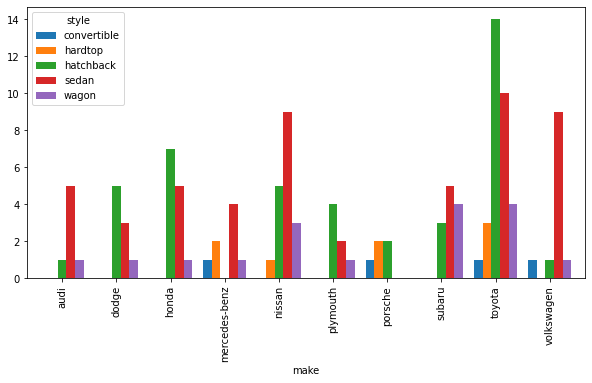

In [31]:
from matplotlib.pyplot import plot
plt.rcParams['figure.figsize']=(10,5)
a=car.groupby(['body-style','make']).count().reset_index()
a=a[['make','body-style','symboling']]
a.columns=['make','style','count']
a=a.pivot('make','style','count')
a.dropna(thresh=3).plot.bar(width=0.8)
plt.ioff()
plt.show()

dodge, honda,plymouth and toyota companies sold hatchback cars 
    
audi,benz,nissan subaru,volkswagen companies sold sedan based cars. 

# Getting details of Engine type,Number of doors,Type of fuel & body style.

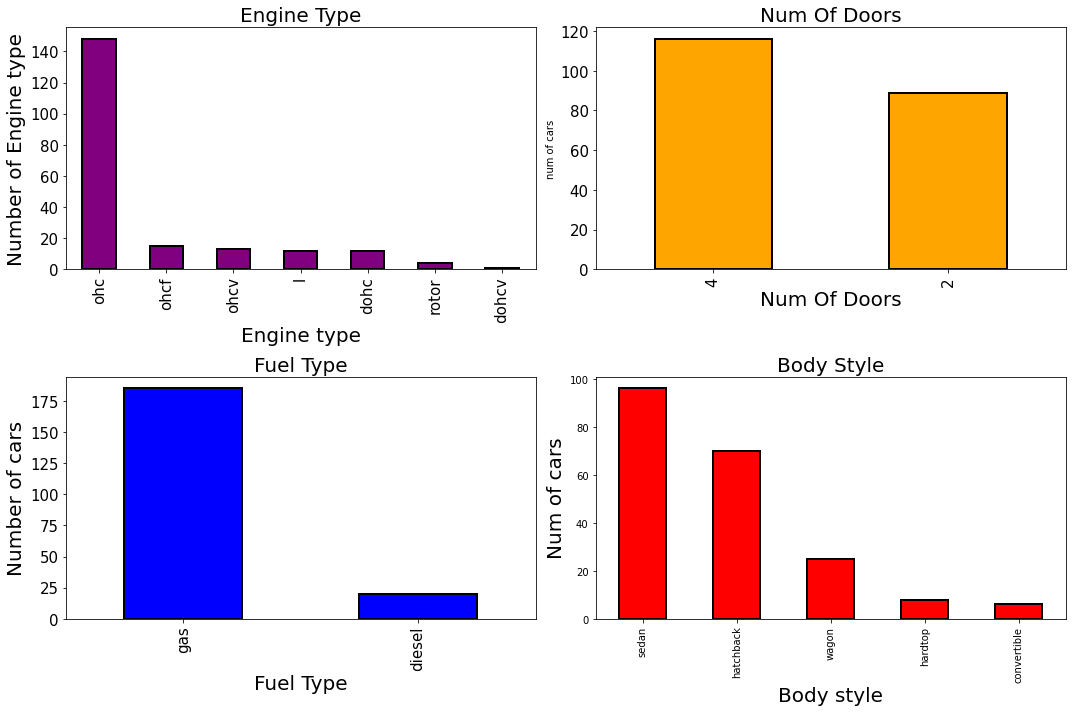

In [32]:
plt.figure(1)
plt.subplot(221)
ax1=car['engine-type'].value_counts(normalize=False).plot(figsize=(15,10),kind='bar',color='purple',edgecolor='k',linewidth=2)
plt.title('Engine Type',fontsize=20)
plt.xlabel("Engine type",fontsize=20,rotation='horizontal')
plt.ylabel("Number of Engine type",fontsize=20)
ax1.tick_params(labelsize=15)


plt.subplot(222)
ax2=car['num-of-doors'].value_counts(normalize=False).plot(figsize=(15,10),kind='bar',color='orange',edgecolor='k',linewidth=2)
plt.title('Num Of Doors',fontsize=20)
plt.xlabel("Num Of Doors",fontsize=20)
plt.ylabel("num of cars")
ax2.tick_params(labelsize=15)


plt.subplot(223)
ax3=car['fuel-type'].value_counts(normalize=False).plot(figsize=(15,10),kind='bar',color='blue',edgecolor='k',linewidth=2)
plt.title('Fuel Type',fontsize=20)
plt.xlabel('Fuel Type',fontsize=20)
plt.ylabel('Number of cars',fontsize=20)
ax3.tick_params(labelsize=15)


plt.subplot(224)
ax4=car['body-style'].value_counts(normalize=False).plot(figsize=(15,10),kind='bar',color='red',edgecolor='k',linewidth=2)
plt.title('Body Style',fontsize=20)
plt.xlabel('Body style',fontsize=20)
plt.ylabel('Num of cars',fontsize=20)
plt.tight_layout()
plt.show()

# 

1.ohc(overhead cam )type of engines are more in dataset 

2.Most cars sold have 4 doors

3.petrol cars sold more 

4.Sedan cars are more popular  


# Fuel economy by car

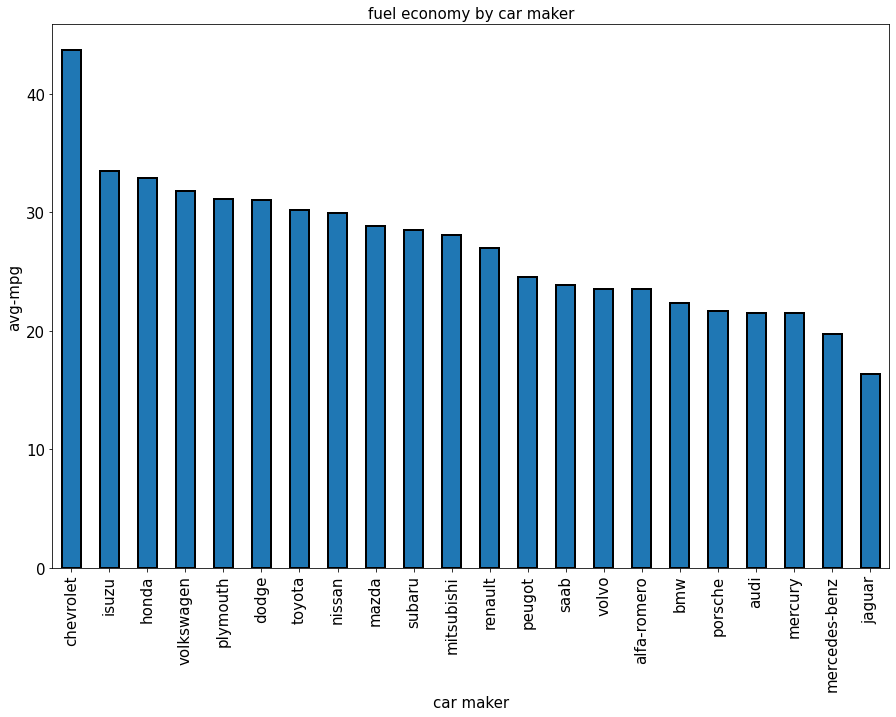

In [33]:
plt.figure(1)
mileage=car.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(figsize=(15,10),edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('car maker',fontsize=15)
plt.ylabel('avg-mpg',fontsize=15)
plt.title('fuel economy by car maker',fontsize=15)
ax.tick_params(labelsize=15)
plt.show()

chevrolet which is brand of GM had highest mileage.

cars with lower engine capacity generally have higher fuel economy.

# Relation between horse power an number of cylinders 

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

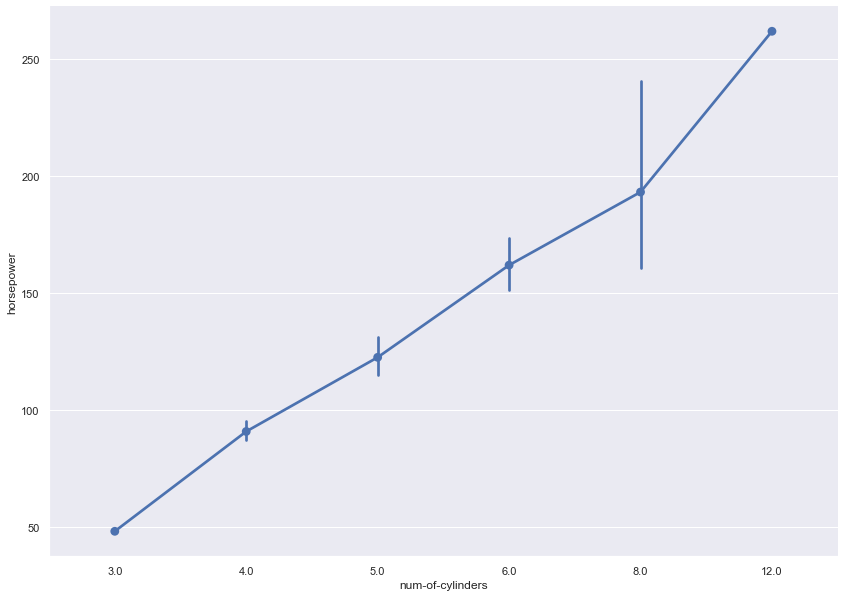

In [34]:
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
sns.factorplot(data=car, x="num-of-cylinders", y="horsepower",height=8.27, aspect=11.7/8.27)
plt.show()

We can see that the range of power o/p from 12 cylinder engine is high

# car price based on Make

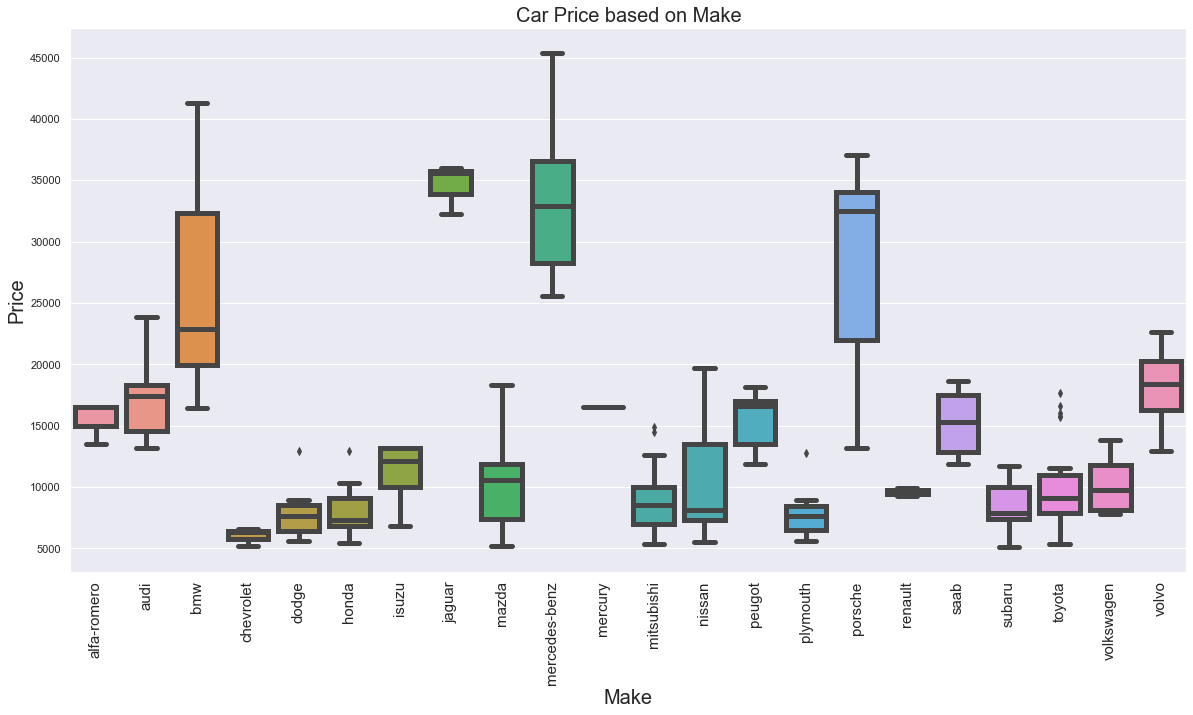

In [35]:
plt.rcParams['figure.figsize']=(20,10)

ax=sns.boxplot(x='make',y='price',data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make',fontsize=20)
ax.set_title('Car Price based on Make',fontsize=20)
plt.ylabel('Price',fontsize=20)
ax.tick_params(labelsize=15,rotation=90,axis='x')

We can see that Mercedes-benz,BMW,Porsche sell the expensive cars in US.


# Price based on the type of vehicle

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


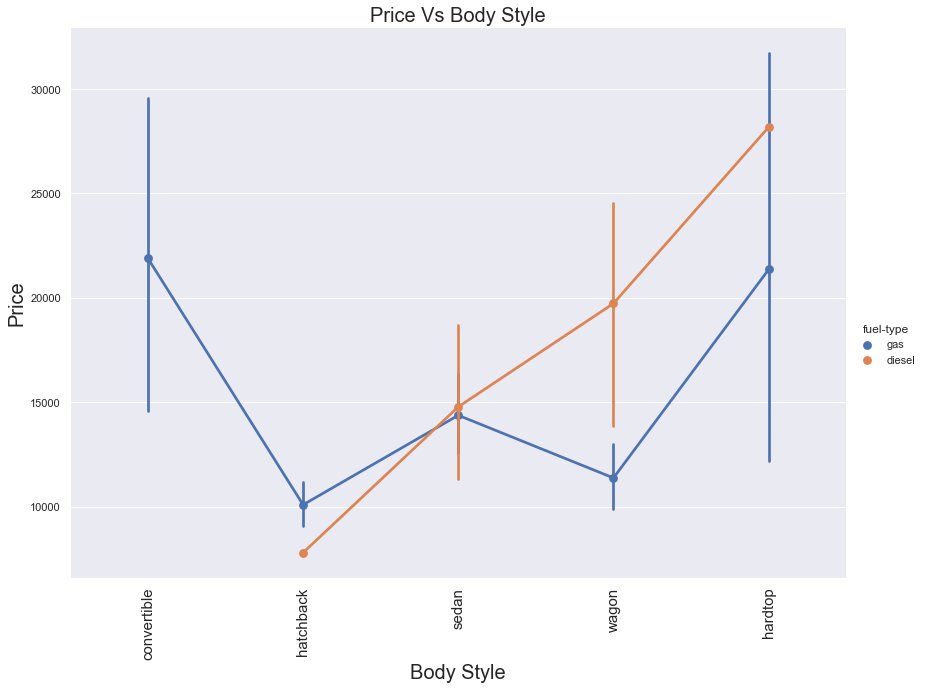

In [36]:
sns.factorplot(data=car,x='body-style',y='price',hue='fuel-type',kind='point',height=8.27,aspect=11.7/8.27)
plt.xlabel('Body Style',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Price Vs Body Style',fontsize=20)
plt.tick_params(labelsize=15,rotation=90,axis='x')

# car price based on drive

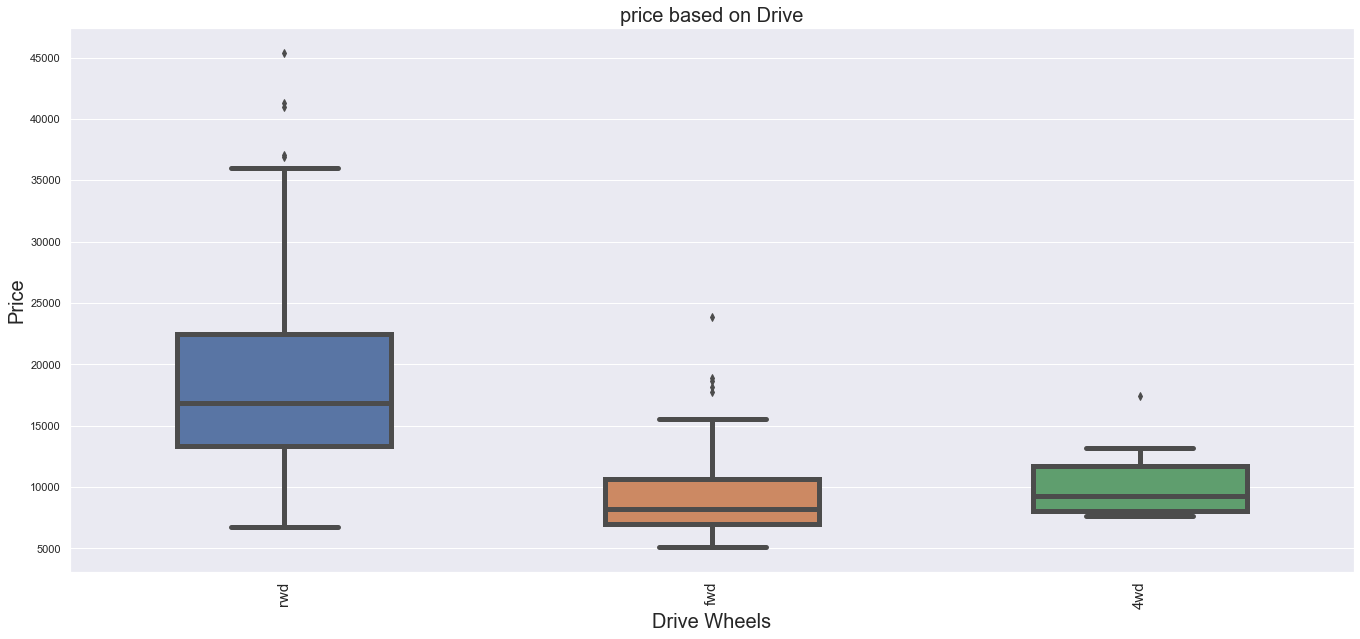

In [37]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(x='drive-wheels',y='price',linewidth=5,data=car,width=0.5)
plt.xlabel('Drive Wheels',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('price based on Drive',fontsize=20)
ax.tick_params(labelsize=15,axis='x',rotation=90)

Rear wheel drive are more expensive with a median price of $17000,generally four wheel drive are more expensive.This is bit surprising.

# Heat Map

<AxesSubplot:>

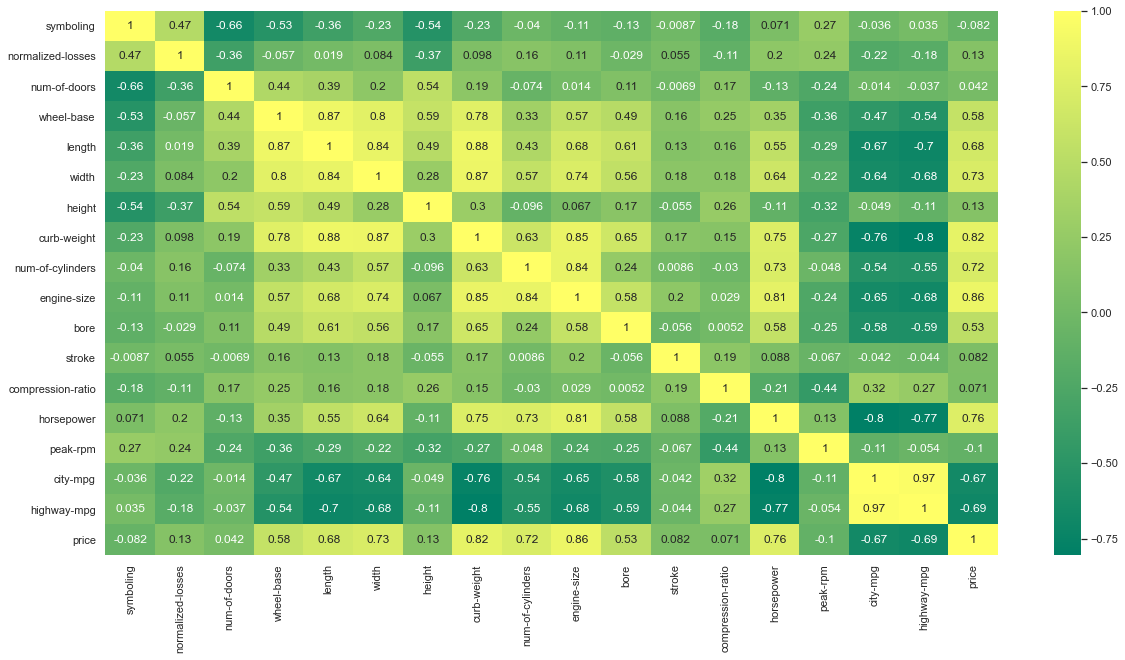

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(),annot=True,cmap='summer')

From the heatmap we can see that the features width,,curb weight,engine size

and horsepower have the highest correlation with the price.We can see these four 

features for our predicting the price of the car

# pair plot

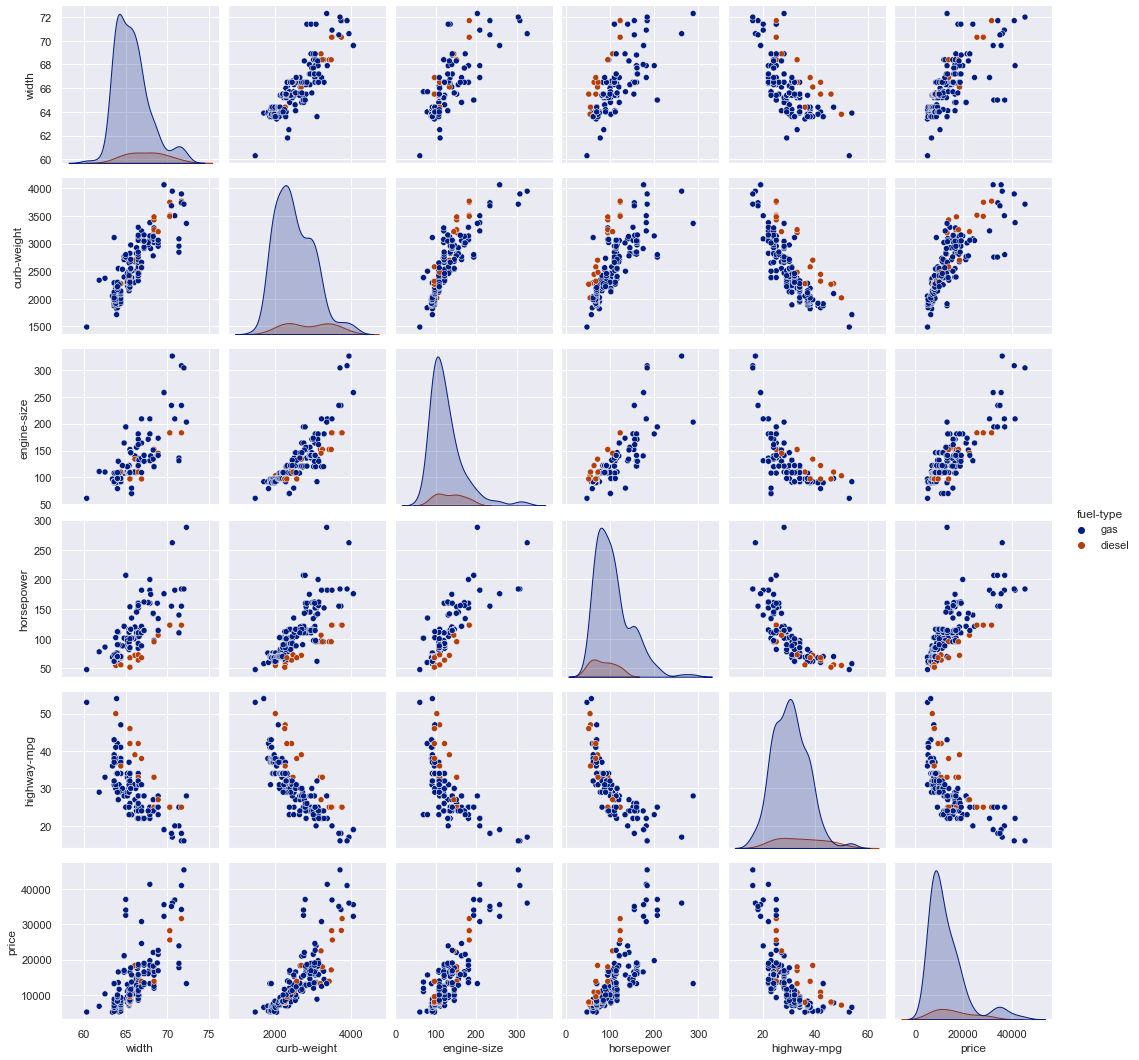

In [39]:
ax=sns.pairplot(car[['width','curb-weight','engine-size','horsepower','highway-mpg','fuel-type','price']],hue='fuel-type',palette='dark')

# Building Machine Learning Model


# Predicting the price of cars

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Matrix of features

In [42]:
import numpy as np
import pandas as pd
X=car.iloc[ : , [11,13,16,21]].values
y=car.iloc[ : , -1].values

We have considered width,curb-weight,engine-size,horsepower for car price prediction

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)

In [46]:
print('Training Set:',len(X_train))
print("Test set:",len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 184
Test set: 21
Training labels: 184
Test labels: 21


# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model Evaluation
Mean square error,R squared & Mean Absolute Error

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
'''Get Predictions & Print Metrics'''
predicts=lr.predict(X_test)
print('''Mean squared Error:{}
R2 score :{}
Mean Absolute Error :{}'''.format(np.sqrt(metrics.mean_squared_error(y_test,predicts)),r2_score(y_test,predicts),mean_absolute_error(y_test,predicts)))

Mean squared Error:6215.106661342076
R2 score :0.09340790042018587
Mean Absolute Error :3707.199157349764


# Root mean squared error

In [49]:
from sklearn.metrics import mean_squared_error
import math
rmse=math.sqrt(mean_squared_error(y_test,predicts))
print("RMSE of the model:",rmse)

RMSE of the model: 6215.106661342076


RMSE is high may be because we have very small dataset

# R squared Error

In [50]:
r2_train=lr.score(X_train,y_train)
r2_test=lr.score(X_test,y_test)
print('R squared Error for train set:',r2_train)
print('R squared Error for test set:',r2_test)

R squared Error for train set: 0.8130467417832229
R squared Error for test set: 0.09340790042018587


##### from the adjusted R-squre value for the test set we can say that our model is overfitting on train set.